# Load DEAP dataset from matlab format

In [6]:
from IPython.utils import io
import numpy as np
import collections

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle

import scipy.io
from scipy import signal, integrate
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Dropout

import mne
import eeg_entropy
import math

n_second = 60
n_segment = 2*n_second-1
n_points = n_second*128
bottleneck = 12

In [2]:
def load_np_data(dimension):
    if dimension == 'valence':
        all_labels, all_data = np.load('../Data/processed_DEAP/valence/' + 'all_valence_labels.npy', allow_pickle=True), np.load('../Data/processed_DEAP/valence/' + 'all_valence_data.npy', allow_pickle=True)
        print("Total valence: ", all_labels.shape, all_data.shape)
        #print("High and low valence: ", collections.Counter(all_labels))# 587 high valence, 472 low valence
    elif dimension == 'arousal':
        all_labels, all_data = np.load('../Data/processed_DEAP/arousal/' + 'all_arousal_labels.npy', allow_pickle=True), np.load('../Data/processed_DEAP/arousal/' + 'all_arousal_data.npy', allow_pickle=True)
        print("Total arousal: ", all_labels.shape, all_data.shape)
        #print("High and low arousal: ", collections.Counter(all_labels))# 620 high arousal, 462 low arousal
    return all_labels, all_data

In [3]:
all_labels, all_data = load_np_data(dimension="valence")

Total valence:  (1059,) (1059, 32, 7680)


In [4]:
# after stanardization
print(np.amax(all_data)) # max value
print(np.amin(all_data)) # min value

91.75265724740024
-100.00674912321686


# Bandpass filter

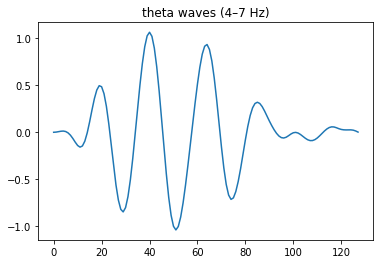

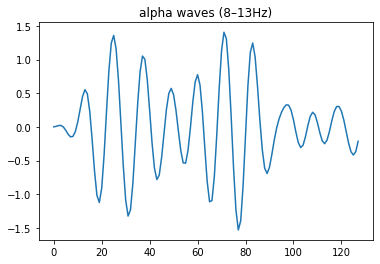

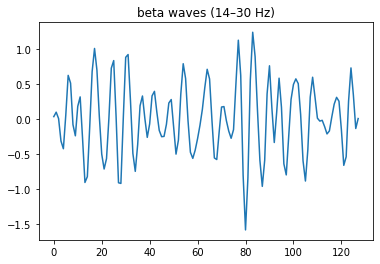

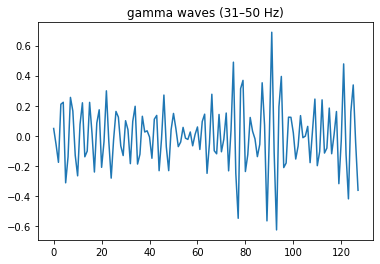

In [7]:
# Butterworth Bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# theta waves (4–7 Hz), alpha waves (8–13Hz), beta waves (14–30 Hz) and gamma waves (31–50 Hz)
x = butter_bandpass_filter(all_data[0][0][:128], 4, 7, 128, order=3)
plt.title("theta waves (4–7 Hz)")
plt.plot(x)
plt.show()
y = butter_bandpass_filter(all_data[0][0][:128], 8, 13, 128, order=3)
plt.title("alpha waves (8–13Hz)")
plt.plot(y)
plt.show()
y = butter_bandpass_filter(all_data[0][0][:128], 14, 30, 128, order=3)
plt.title("beta waves (14–30 Hz)")
plt.plot(y)
plt.show()
y = butter_bandpass_filter(all_data[0][0][:128], 31, 50, 128, order=3)
plt.title("gamma waves (31–50 Hz)")
plt.plot(y)
plt.show()

# Numpy operation experiment

In [22]:
# (1059, 32, 8064) to(1059, 8064, 32)
a = np.random.randint(10, size=(3, 2, 4))# (1059, 32, 8064) 3 trials, 2 channels, 4 points
print(a)
a = np.moveaxis(a, -1, 1) # (1059, 8064, 32)
print(a.shape)
print(a)
a = a.reshape((a.shape[0]*a.shape[1], a.shape[2]))
print(a.shape)
print(a)

[[[6 9 9 9]
  [8 0 2 1]]

 [[5 4 8 8]
  [1 5 8 2]]

 [[1 5 4 8]
  [4 5 9 6]]]
(3, 4, 2)
[[[6 8]
  [9 0]
  [9 2]
  [9 1]]

 [[5 1]
  [4 5]
  [8 8]
  [8 2]]

 [[1 4]
  [5 5]
  [4 9]
  [8 6]]]
(12, 2)
[[6 8]
 [9 0]
 [9 2]
 [9 1]
 [5 1]
 [4 5]
 [8 8]
 [8 2]
 [1 4]
 [5 5]
 [4 9]
 [8 6]]


# Split train and test data, 10-fold cross-validation

In [1]:
autoencoder.save("autoencoder_model")

NameError: name 'autoencoder' is not defined

In [3]:
print("dff"+str(1))

dff1


In [24]:
train_valence_data_encoded = encoder.predict(train_valence_vectors)
print(train_valence_data_encoded.shape) # (6846336, 12)

(6846336, 12)


In [26]:
train_valence_data_encoded = inverse_vector_transform(train_valence_data_encoded) 
print(train_valence_data_encoded.shape)# (849, 12, 8064)

(849, 12, 8064)


# Numpy operation experiment

In [17]:
a = np.random.randint(10, size=(2, 3, 4))# (32, 61, 125) 2 channels, 3 frequency, 4 segments
print(a)
a = np.moveaxis(a, -1, 0) # (125, 32, 61)
print(a.shape)
print(a)

[[[1 8 7 3]
  [0 8 1 9]
  [0 4 2 7]]

 [[8 7 0 0]
  [6 9 5 9]
  [1 5 7 7]]]
(4, 2, 3)
[[[1 0 0]
  [8 6 1]]

 [[8 8 4]
  [7 9 5]]

 [[7 1 2]
  [0 5 7]]

 [[3 9 7]
  [0 9 7]]]


# Autoencoder structure

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
Total params: 5,804
Trainable params: 5,804
Non-trainable params: 0
_________________________________________________________________


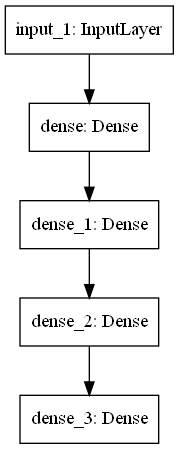

In [27]:
# create new autoencoder
input_layer = Input(shape=(32,))
encoded = Dense(64, activation=None)(input_layer)
bottleneck_layer = Dense(12, activation=None)(encoded)
decoded = Dense(64, activation=None)(bottleneck_layer)
decoded = Dense(32, activation=None)(decoded)
autoencoder = Model(input_layer, decoded)
#autoencoder.summary()
encoder = Model(input_layer, bottleneck_layer)
#encoder.summary()
decoder_input_layer = Input(shape=(12,))
decoder_layer = autoencoder.layers[-2](decoder_input_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(decoder_input_layer, decoder_layer)
#decoder.summary()

# LSTM network

Model: "functional_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 125, 128)]        0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 125)               127000    
_________________________________________________________________
dense_38 (Dense)             (None, 125)               15750     
_________________________________________________________________
dropout_9 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 126       
Total params: 142,876
Trainable params: 142,876
Non-trainable params: 0
_________________________________________________________________


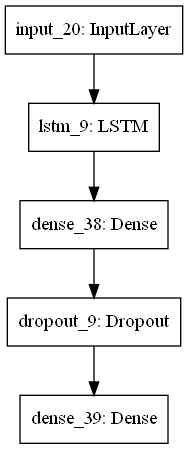

In [118]:
x=Input(shape=(125,128)) # flatten (4,12) to 48
x1=LSTM(125, dropout=0.2)(x)
x2=Dense(125)(x1)
x2=Dropout(rate = 0.2)(x2)
output=Dense(1, activation="sigmoid")(x2)

model=Model(x, output)
model.summary()
keras.utils.plot_model(model, to_file="LSTM_model.png")

# Visualise Welch's method of PSD extraction

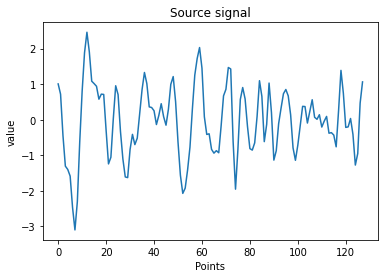

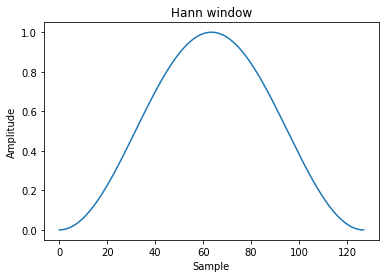

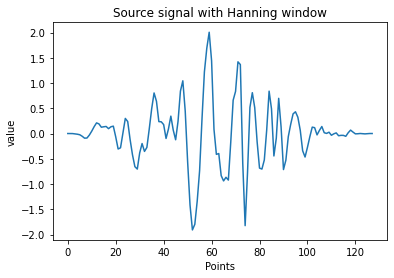

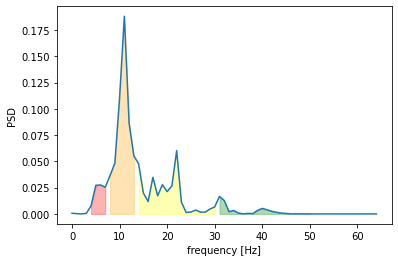

In [13]:
# original 128 points signal (1 second)
plt.plot(all_data[0][0][:128])
plt.title("Source signal")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

# visualise hanning window
window = np.hanning(128)
plt.plot(window)
plt.title("Hann window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

# signal with hanning window
plt.plot(all_data[0][0][:128]*window)
plt.title("Source signal with Hanning window")
plt.xlabel('Points')
plt.ylabel('value')
plt.show()

# visualise PSD feature
# theta waves (4–7 Hz), alpha waves (8–13Hz), beta waves (14–30 Hz) and gamma waves (31–50 Hz)
f, Pxx_den = signal.welch(all_data[0][0][:128], fs=128, window='hann', nperseg = 128, noverlap=64)
plt.plot(f, Pxx_den)
plt.fill_between(f[4:8], Pxx_den[4:8], alpha = 0.3, color='red')
plt.fill_between(f[8:14], Pxx_den[8:14], alpha = 0.3, color='orange')
plt.fill_between(f[14:31], Pxx_den[14:31], alpha = 0.3, color='yellow')
plt.fill_between(f[31:51], Pxx_den[31:51], alpha = 0.3, color='green')
plt.ylim()
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.show()

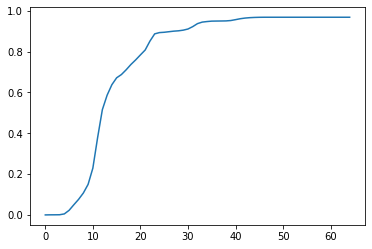

Frequency band power of first channel of first frame:  [0.07127272 0.47949792 0.27294861 0.04602214]


In [14]:
# use integration to calculate frequency band power
x = f
y = Pxx_den
y_int = integrate.cumtrapz(y, x, initial=0)
plt.plot(x, y_int)
plt.show()

band_power = np.array([y_int[7]-y_int[4],y_int[13]-y_int[8],y_int[30]-y_int[14],y_int[51]-y_int[31]])
print("Frequency band power of first channel of first frame: ", band_power)